In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import xgboost as xgb

import matplotlib.pyplot as plt

import sklearn.kernel_ridge
from sklearn import preprocessing
from sklearn import base

# Data Description
<br> Train_1: This dataframe has page views fro more than 145k pages for 550 days </br>
<br> Key_1: has a special id for each page and each date in sixty days ,so each row represents each page at a particular date,we will be needing this while predicting</br> 
<br> Train_2: This dataframe has page views fro more than 145k pages for 880 days </br>
<br> Key_2: has a special id for each page and each date in 45 days ,so each row represents each page at a particular date</br> 


## Business Problem 

<br>Ability to predict pageviews for a webpage upholdes a great value for any business,it can help in the following ways:</br>
<br>the business can prepare themselves for the traffic with enough servers so that the website does'nt crashes when the traffic high</br>
<br> It can monetize pages with high pageviews by enabling ads on that particular page</br>
<br> It can also help to now the general trend/opinions of people towards certain issues</br>

## Why machine learning?

Although there exist many business intelligence tools , but the process data in such large quantities and make the optimum utilistaion of the data is not achieved like identifying the trend,anomolies and espicially forecasting. Doing a predictive analysis of such data is quite time consuimg and inaccurate if we use basic tools

In [2]:
train_2 = pd.read_csv("train_2.csv")
key_2 = pd.read_csv("key_2.csv")

In [7]:
key_2.shape[0]/train_2.shape[0]

62.0

In [8]:
key_1["Page"].shape

(8703780,)

In [9]:
sam = pd.read_csv('sample_submission_1.csv')

In [13]:
pd

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a
...,...,...
8703775,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,f69747f5ee68
8703776,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,2489963dc503
8703777,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,b0624c909f4c
8703778,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,24a1dfb06c10


In [4]:
print("train shape",train_1.shape)
print("key shape",key_1.shape)

train shape (145063, 551)
key shape (8703780, 2)


In [5]:
key_1.shape

(8703780, 2)

# Pages 


In [32]:
train_2[["topic","lang","access","type"]] = train_1["Page"].str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

In [40]:
train_2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,topic,lang,access,type
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh,all-access,spider


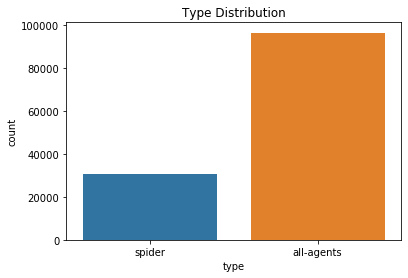

In [34]:
plt.title("Type Distribution")
sns.countplot(train_2["type"])
plt.show()

So here we see that the most of pages here are from the type all-agents .

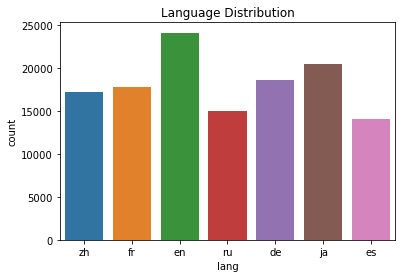

In [35]:
plt.title("Language Distribution")
sns.countplot(train_2["lang"])
plt.show()

English has the highest number of pages here , then japanese , We look what are the page views in english are high or not .We will plot median of every day of each language 

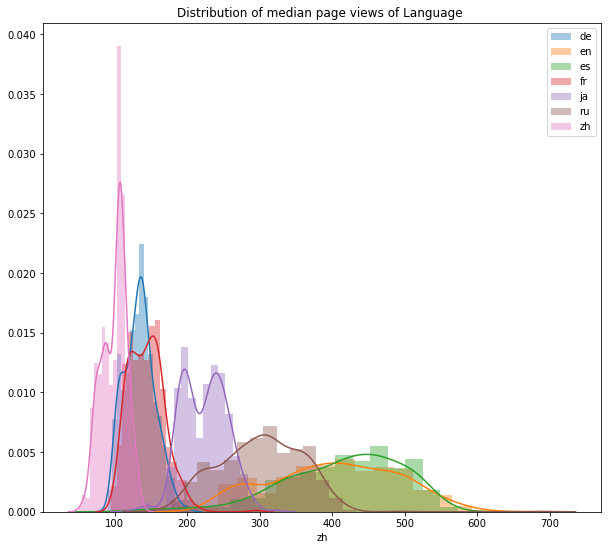

In [36]:

language_df = train_2.groupby("lang").median()
langs = language_df.index.values

plt.figure(figsize=(10,9))
plt.title("Distribution of median page views of Language ")
for i in langs:

    sns.distplot(language_df.xs(i),label = i)
    plt.legend()

<br> I suspect that the data has outliers so in order to make a good analysis of page views according to their languages , I used median views per language</br>
<br>1) The median page view of spanish and russian langauage pages have high variance </br>
<br> 2)German and French pages have a low variance</br>
<br> 3)We see Chinese, Japanese and English have model distribution </br>
<br>4)We see that Russian,Spanish and English have high variance</br>

ValueError: x and y must have same first dimension, but have shapes (550,) and (803,)

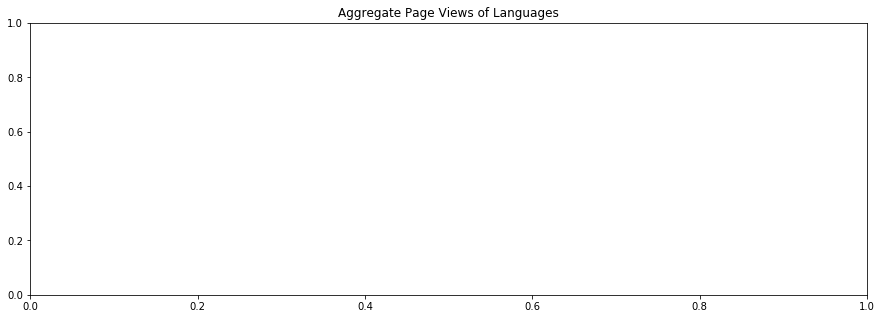

In [37]:
language_df = train_2.groupby("lang").sum()
langs = language_df.index.values




import matplotlib.pyplot as plt

days = list(range(1,551))
plt.figure(figsize=(15,5))
plt.title("Aggregate Page Views of Languages")

for y_arr, label in zip(language_df.values,langs):
    plt.plot(days, y_arr, label=label)

plt.legend()
plt.show()

<br> As we expected the aggrgate of english is more than all the language ,we see a spike in russian when the english languge spike, it would be necessary to investigate further about the high spike around 400th day</br>
<br> We can comment except english and russian , other language's time series have a stationary time series</br>

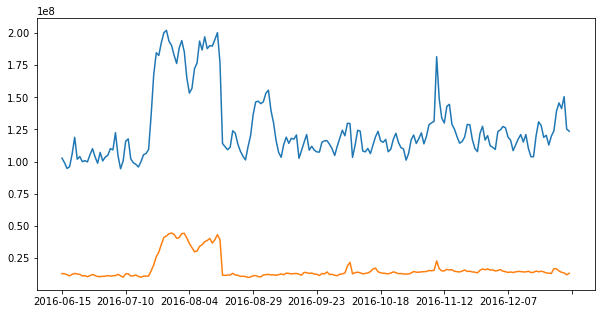

In [12]:
plt.figure(figsize=(10,5))
language_df.xs("en")[350:550].plot()
language_df.xs("ru")[350:550].plot()
plt.show()

</br> After seatching major news I realised why there is peak from July to September , since there were following major news :</br>
<br>1) Brexist came into news at this time </br>
<br>2)North Korea Conducts Missile and Nuclear Tests</br>
<br>3)Eastern Aleppo Falls</br>
<br>4)Russia Interferes in the U.S. Presidential Election
<br>5) Donald Trump becomes the president of USA.
<br> Well we see clearly see that why Russian page views also had a high pageview median along the English pageviews medians , since the news which caused the related to russia and usa, like in aleppo war russia was involoved and 4th news also clearly states that</br>
</br> The last news which caused the hige spike, most probably would the US election results </br> 


<br> There is a upward trend but 4/8/2016 there is a huge spike

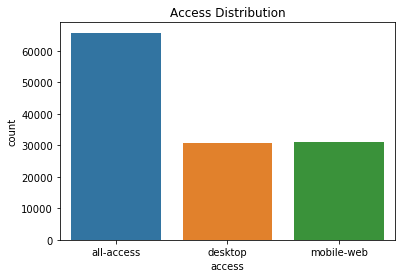

In [41]:
plt.title("Access Distribution")
sns.countplot(train_2["access"])
plt.show()

<br> All access has the highest count</br>

## Access language plots

In [38]:
access_lang_df  =train_2.groupby(["lang","access"]).median()

In [39]:
access = train_2["access"].unique()

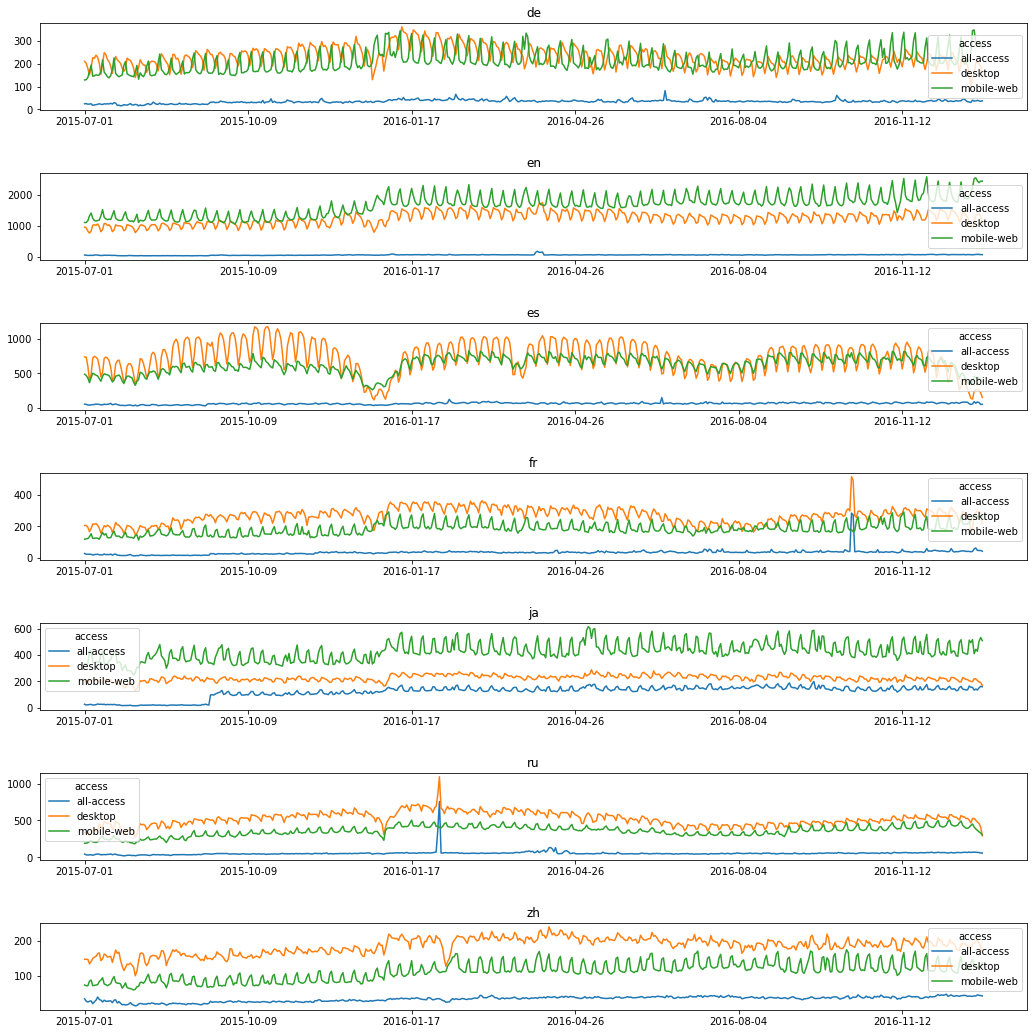

In [16]:
f, a = plt.subplots(7,1,figsize=(15,15))
for i, j in enumerate(langs):
    ax = a[i]
    access_lang_df.xs(j).T.plot(ax=ax)
    ax.set_title(j)
f.tight_layout(pad=3.0)

<br> 1)We see that in Japanese(ja) and English(en) mobile access had more median page views</br>
<br> 2)While dektop has more median page views in Chinese(zh),Russian(ru) and French(fr)</br>
<br>3)We see that these time series have a strong cyclical component</br>
<br> 4)There are some sharp spikes that has to be taken care of like in russian language newar 17/1/2016</br>
<br> 5)On interesting observation is that the number of pages of all-access is more while the volumne that means the page views are actually less in all-access</br>

## Type Language plots

In [17]:
type_lang_df  =train_1.groupby(["lang","type"]).median()

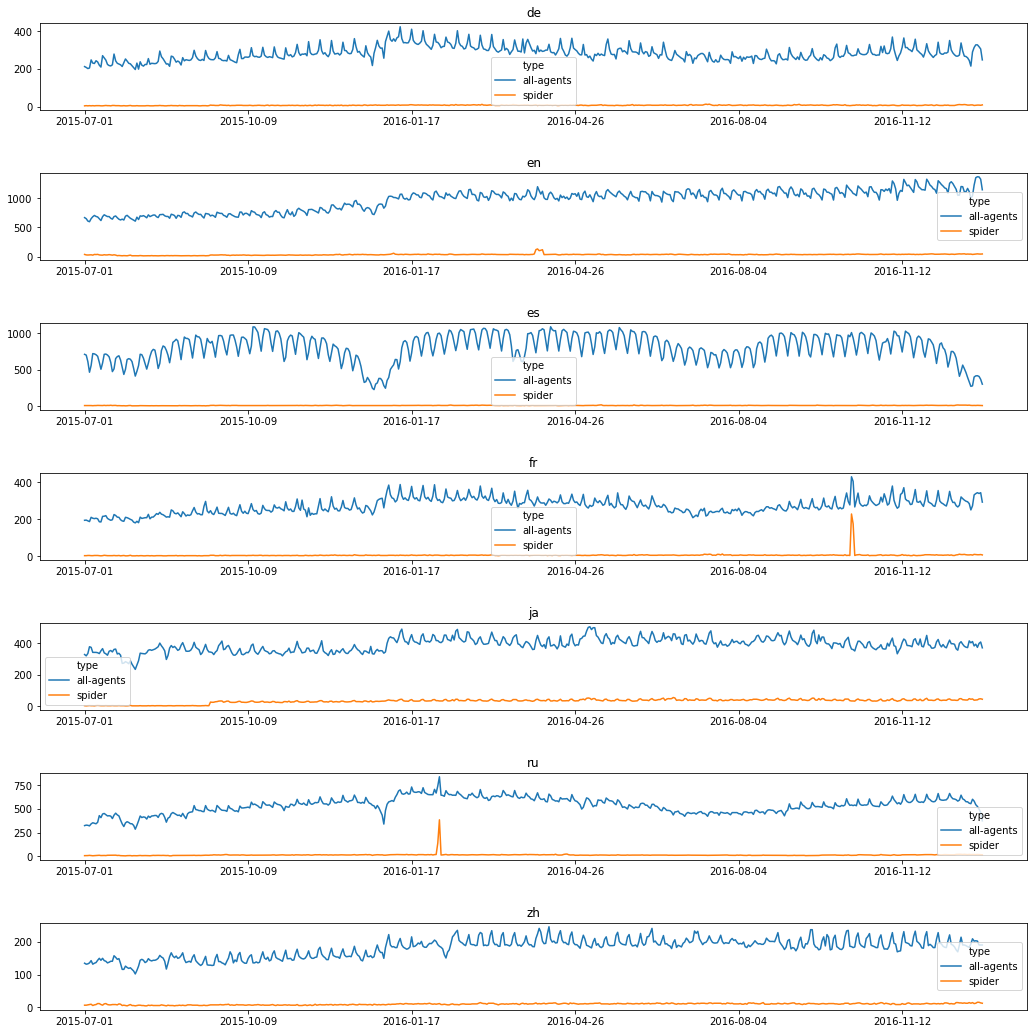

In [18]:
f, a = plt.subplots(7,1,figsize=(15,15))
for i, j in enumerate(langs):
    ax = a[i]
    type_lang_df.xs(j).T.plot(ax=ax)
    ax.set_title(j)
f.tight_layout(pad=3.0)

    
    

## NAN values

First I want to find out the pattern in Nan values then I want to know what is the reason of Nan values and last is how to impute them.

In [42]:
check_nan = train_2[train_2["Page"] =="生化危機7_zh.wikipedia.org_all-access_all-agents"]

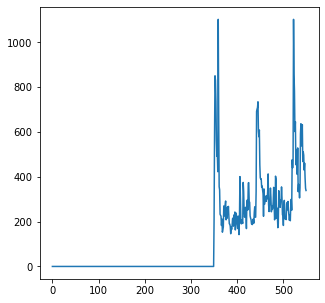

In [43]:
days = range(0,550)
plt.figure(figsize = (5,5))
plt.plot(days,check_nan.iloc[:,1:551].T.fillna(0))
plt.show()

I looked for the translation in google for "生化危機7" in google , this 'Resident Evil 7: Biohazard' came , basically this is a video game which was announced around may/June and consequantly this page was also created aroung 15 June 2016,I found out form clicking in the history of this page on wikipedia
,https://en.wikipedia.org/w/index.php?title=Resident_Evil_7:_Biohazard&dir=prev&offset=20160614174701%7C725279311&action=history

So, now we now we have to find a way to impute such values, we can now confidently say that one of the reason why there is Nan values , can be because there was no such page existed, but we have to find that is it with every other page. 
Now lets check if there is a page which was created but then it was removed , that means there should a nan on the last date 

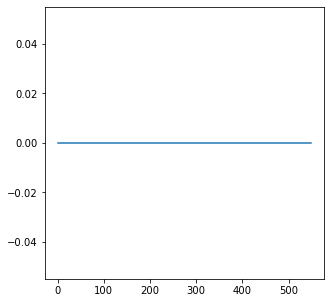

In [21]:
last_date_nan= train_1[train_1['2016-12-31'].isnull()]
check_nan = train_1[train_1["Page"] =='Tesla_(Unternehmen)_de.wikipedia.org_desktop_all-agents']
plt.figure(figsize = (5,5))
plt.plot(days,check_nan.iloc[:,1:551].T.fillna(0))
plt.show()

This is weird , The Page is Nan all the time , may be the page has no view at all, because if it was not created ever , then why it is there in the list of Pages.Lets look at some previous Pages

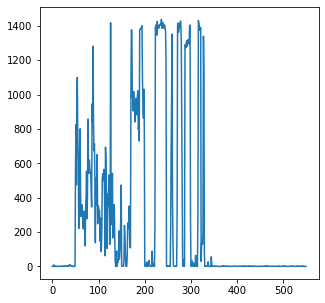

In [44]:
check_nan = train_2[train_2["Page"] =='Datei:2012-03-15_Bonn_Poppelsdorfer_Allee_Fassaden_(2).JPG_de.wikipedia.org_desktop_all-agents']
plt.figure(figsize = (5,5))
plt.plot(days,check_nan.iloc[:,1:551].T.fillna(0))
plt.show()

Now this another plot which is quite differebt ,since it drops to nan ,that means the page might have been removes, if it was then it might be in a downward trend

</br> We can make a function to see when a time series is starting and when it is ending </br> 
</br> This will help us to group those pages which were not existing and those pages that were existing and later deleted or have nan values , this will allow us to have a better imputation for nan values </br>

In [45]:
def calculate_start_end(data: np.ndarray):
    '''
    Calculates start and end of series.
    Start = first non nan value
    End = last non nan value
    '''
    rows,columns =data.shape

    # array where idx will be stored. if none is found, defaults to -1
    start_idx = np.full(rows, -1, dtype=np.int32)
    end_idx = np.full(rows, -1, dtype=np.int32)

    for page in range(rows):
        # start idx
        for day in range(columns):
            # if nan 1, get index for 1
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                start_idx[page] = day
                break
        for day in range(columns - 1, -1, -1):
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                end_idx[page] = day
                break

    return start_idx, end_idx

In [46]:
start,end = calculate_start_end(np.array(train_2.iloc[:,1:551]))

In [47]:
train_2["start"] =start
train_2["end"] = end
train_2["no_of_days"] = train_2["end"] - train_2["start"] # for how many days the page was there on the page

In [50]:
all_nan_pages= train_2[train_2["no_of_days"]==0]
all_nan_pages.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-08,2017-09-09,2017-09-10,topic,lang,access,type,start,end,no_of_days
117,Pristin_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,15.0,6.0,Pristin,zh,all-access,spider,-1,-1,0
148,TWICEcoaster:_LANE_2_zh.wikipedia.org_all-acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,4.0,TWICEcoaster:_LANE_2,zh,all-access,spider,-1,-1,0
174,Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,10.0,18.0,Yuri!!!_on_ICE,zh,all-access,spider,-1,-1,0
3904,Special:搜索limit=20_zh.wikipedia.org_all-access...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Special:搜索limit=20,zh,all-access,spider,-1,-1,0
4282,陳宣儒_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,5.0,陳宣儒,zh,all-access,spider,-1,-1,0


So these pages were nan throughout the whole training data , we can check further were there any value of these series in train_2

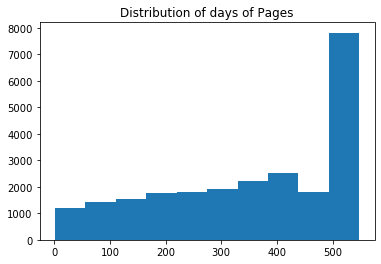

In [51]:
mid_start_end = train_2[(train_2["no_of_days"] > 0) &(train_2["no_of_days"]<549)]["no_of_days"]
plt.title("Distribution of days of Pages")
plt.hist(mid_start_end)
plt.show()

## Conclusion of Nan 
We Can do the following, if there is no value of the page in whole data , then drop the page , if the data has significat value of value of data we might used forward rolling or backward rolling . For now I am assuming them to be 0

In [52]:
## For now i am imputting the Na values with 0
train_2= train_2.fillna(0)

## Outliers 

### Hampel filter 

<br>So Hampel filter is a filter which is used in a time series to identitfy outliers and replace them with a better value.The filter is basically a window sliding function which slides across the time series.For each window ,the filter calculates the median and estimated the window's standard deviation using MAD,fir any point in window if it is morw than 3sigma out from thye windows median,then the value will be replaced by median of that window</br>

https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d

In [30]:
import numba

In [31]:
numba.jit(nopython=True) # numba helps to reduce the time 
def hampel_filter(input_series, window_size, n_sigmas=3):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    indices = []
    
    for i in range((window_size),(n - window_size)): #range(if n=14 ,for the is from 14 to 536(546))
        x0 = np.median(input_series[(i - window_size):(i + window_size)]) # calculating the median of that window for 14th value we are calculating the median of 0 to 28
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0)) # MAD * by a constant factor
        if (np.abs(input_series[i] - x0) > n_sigmas * S0): # comparing the value if that is outside the wiindow
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices
        

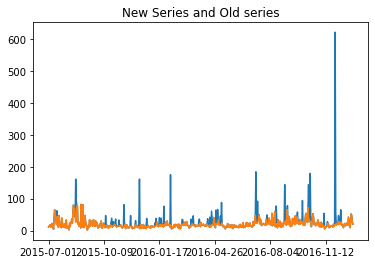

In [32]:
ts1 = train_2.iloc[1,1:551]
ns,idx = hampel_filter(ts1,14)
plt.title("New Series and Old series")
ts1.plot()
ns.plot()
plt.show()

# Topics

In [33]:
topic_count = train_1["topic"].value_counts()

So after grouping the topics , I realised that most of the topics are repeating, so I am giving them a label i.e "High","Mid","Low". I am doing this in order to cluster thhe time series and model accrodingly


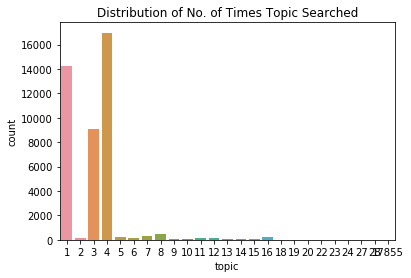

In [34]:
plt.title("Distribution of No. of Times Topic Searched")
sns.countplot(topic_count)
plt.show()

<br> As we see a few topics have been searched more than 5 times,we can group such topics for a better analysis</br>


In [35]:
## So these topics are high searched topics 
print("No. of high serached/popular topics: ",len(topic_count[topic_count >=5]))

## So these topics are high searched topics 
print("No. of mid searched topics: ",len(topic_count[(topic_count <5) & (topic_count >2)])) 

print("No. of low searched topics: ",len(topic_count[(topic_count <=2) ])) 


No. of high serached/popular topics:  1861
No. of mid searched topics:  26016
No. of low searched topics:  14336


In [36]:
high = topic_count[topic_count >=5].index
mid = topic_count[(topic_count <=5) & (topic_count >2)].index
low = topic_count[(topic_count <=2) ].index

len(mid) + len(low) + len(high)

42455

In [37]:
train_2["Search"] =0
train_2["Search"][train_1["topic"].isin(high)] = "High"
train_2["Search"][train_1["topic"].isin(mid)] = "Mid"
train_2["Search"][train_1["topic"].isin(low)] = "Low"
train_2["Search"][train_1["topic"].isnull()] = "Low"

<ipython-input-37-a0781ba39ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1["Search"][train_1["topic"].isin(high)] = "High"
<ipython-input-37-a0781ba39ac7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1["Search"][train_1["topic"].isin(mid)] = "Mid"
<ipython-input-37-a0781ba39ac7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1["Search"][train_1["topic"].isin(low)] = "Low"
<ipython-input-37-a0781ba39ac7>:

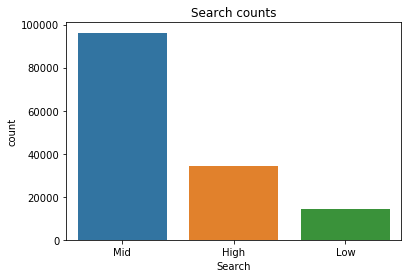

In [38]:
plt.title("Search counts")
sns.countplot(train_1["Search"])
plt.show()

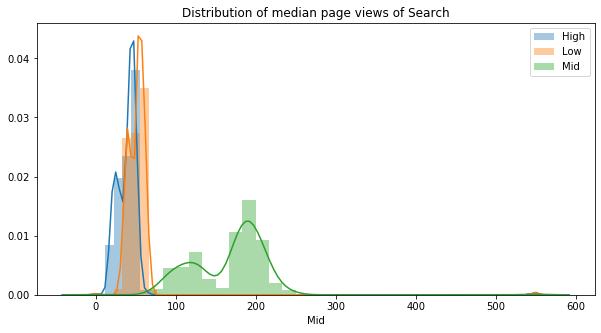

In [39]:

Search_df = train_1.groupby("Search").median()
Search = Search_df.index.values

plt.figure(figsize=(10,5))
plt.title("Distribution of median page views of Search")
for i in Search:

    sns.distplot(Search_df.xs(i),label = i)
    plt.legend()

</br>1) Dividing them was really usefull we can see these pages have a completely different behaviour </br>
<br>2)we can see that the variance of Low search topics is less and the variance of High search topics quite more </br>

##### There was one problem with this feature that this may happen that the time series with high number of topics mightbe starting at the end 

In [40]:
# I am creating a feature which will tell a particular series has 
#been existing for the full time or it is existing for partial time or not at all existing 

In [53]:
train_2["Exist"] = np.where(train_2["no_of_days"] == 549,"Full","Partial")
train_2["Exist"][train_2["no_of_days"] == 0] = "Null"

<ipython-input-53-9f01597759d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2["Exist"][train_2["no_of_days"] == 0] = "Null"


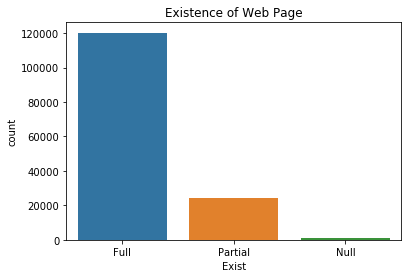

In [55]:
plt.title("Existence of Web Page")
sns.countplot(train_2["Exist"])
plt.show()

This shows that majority of web pages are existing for 550 days, but some pages are not existing for the full time , where as few pages are'nt edo not have a single pageview 

## Days Analysis 

In [43]:
melt_df = pd.melt(train_.iloc[:,0:550],"Page",var_name="Date")

In [44]:
melt_df["Date"] = pd.to_datetime(melt_df["Date"])
melt_df["Day"] = melt_df["Date"].dt.weekday
melt_df["Week"] = melt_df["Date"].dt.week

<ipython-input-44-813ee7a2b677>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  melt_df["Week"] = melt_df["Date"].dt.week


In [45]:
melt_df['Day'].replace(0,'Sunday',inplace=True)
melt_df['Day'].replace(1,'Monday',inplace=True)
melt_df['Day'].replace(2,'Tuesday',inplace=True)
melt_df['Day'].replace(3,'Wednesday',inplace=True)
melt_df['Day'].replace(4,'Thursday',inplace=True)
melt_df['Day'].replace(5,'Friday',inplace=True)
melt_df['Day'].replace(6,'Saturday',inplace=True)

In [46]:
views_day =melt_df.groupby("Day")["value"].sum()

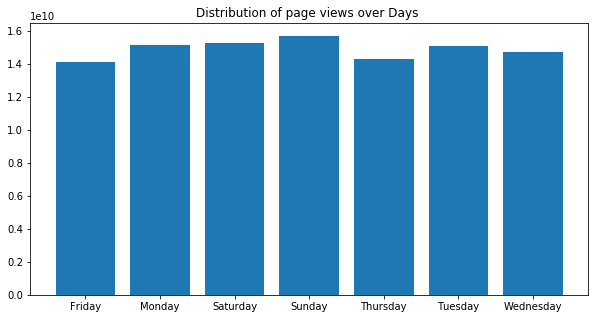

In [47]:
plt.figure(figsize=(10,5))
plt.title("Distribution of page views over Days ")

plt.bar(views_day.index,views_day.values)
plt.show()

We see that weekends have more views than other days 

## New Features 

#### Basic Statistics of a Time series

In [207]:
train = train_2

In [210]:
train= train_2.iloc[:,:740]

In [211]:
def calculate_start_end(data: np.ndarray):
    '''
    Calculates start and end of series.
    Start = first non nan value
    End = last non nan value
    '''
    rows,columns =data.shape

    # array where idx will be stored. if none is found, defaults to -1
    start_idx = np.full(rows, -1, dtype=np.int32)
    end_idx = np.full(rows, -1, dtype=np.int32)

    for page in range(rows):
        # start idx
        for day in range(columns):
            # if nan 1, get index for 1
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                start_idx[page] = day
                break
        for day in range(columns - 1, -1, -1):
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                end_idx[page] = day
                break

    return start_idx, end_idx

In [212]:
start,end = calculate_start_end(np.array(train.iloc[:,1:551]))
train["start"] =start
train["end"] = end
train["no_of_days"] = train["end"] - train["start"] # for how many days the page was there on the page

In [213]:
train["Exist"] = np.where(train["no_of_days"] == 549,"Full","Partial")
train["Exist"][train["no_of_days"] == 0] = "Null"

<ipython-input-213-33228ad036b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Exist"][train["no_of_days"] == 0] = "Null"


In [214]:
train[["topic","lang","access","type"]] = train["Page"].str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

In [215]:
train =train.drop("topic",axis=1)

In [217]:
def create_features(df):
    df['percentile_10'] = df.iloc[:,1:550].quantile(q=0.10,axis=1)
    df['percentile_25'] = df.iloc[:,1:550].quantile(q=0.25,axis=1)
    df['percentile_50'] =  df.iloc[:,1:550].quantile(q=0.50,axis=1)
    df['percentile_75'] = df.iloc[:,1:550].quantile(q=0.75,axis=1)
    df['percentile_90'] = df.iloc[:,1:550].quantile(q=0.90,axis=1)
    
    df["mean"] = df.iloc[:,1:550].mean(axis=1)
    df["median"] = df.iloc[:,1:550].median(axis=1)
    df["max"] = df.iloc[:,1:550].max(axis=1)
    df["min"] = df.iloc[:,1:550].min(axis=1)


    df["hmean"] = stats.hmean(df.iloc[:,1:550].fillna(0),axis=1)  # Harmonic mean
    df["gmean"] =  stats.gmean(df.iloc[:,1:550].fillna(0),axis=1) # Geometeric mean
    df["skewness"] =df.iloc[:,1:550].skew(axis=1)


    df["std"] = df.iloc[:,1:550].std(axis=1)
    df["var"] = df.iloc[:,1:550].var(axis=1)
    df["Kurt"] = df.iloc[:,1:550].kurtosis(axis=1) # Kurt
    
    return df


In [218]:
train = create_features(train)

c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [219]:
def get_features(sin_arr):# singal time series/array
    slope =  stats.linregress(np.arange(sin_arr.shape[0])+1,sin_arr.values)[0]# slope of the time series 
    spearman = stats.spearmanr(np.arange(sin_arr.shape[0])+1,sin_arr.values)[0] #Spearman rank order coefficent
    return slope,spearman

In [ ]:
from pandarallel import pandarallel
from math import sin

pandarallel.initialize()



values= train.iloc[:,1:551].parallel_apply(get_features, axis=1)

In [ ]:
slopes = []
rcor = []
for i in values:
    slopes.append(i[0])
    rcor.append(i[1])

train["slope"] = slopes
train["rcor"] =rcor
    


In [224]:
slopes = np.load("slope.npy")
rcor = np.load("rcor.npy")

In [226]:
rcor = np.load("rcor.npy")

In [234]:
train["slope"] = slopes
train["rcor"] = rcor

In [228]:
for i in range(25):
    dt = train.iloc[:,i*30:(i+1)*30]
    med = dt.median(axis=1)
    train["montly_medi_{}".format(i)] = med

In [229]:
last_2_months = train.iloc[:,-56:]

for i in range(8):
    dt = last_2_months.iloc[:,i*7:(i+1)*7]
    med = dt.median(axis=1)
    train["last_8_weeks_{}".format(i)] = med


In [235]:
non_date_cols = ['Page','start',
 'end',
 'no_of_days',
 'lang',
 'access',
 'type',
 'percentile_10',
 'percentile_25',
 'percentile_50',
 'percentile_75',
 'percentile_90',
 'mean',
 'median',
 'max',
 'min',
 'hmean',
 'gmean',
 'skewness',
 'std',
 'var',
 'Kurt',
 'slope',
 'rcor',
 'montly_medi_0',
 'montly_medi_1',
 'montly_medi_2',
 'montly_medi_3',
 'montly_medi_4',
 'montly_medi_5',
 'montly_medi_6',
 'montly_medi_7',
 'montly_medi_8',
 'montly_medi_9',
 'montly_medi_10',
 'montly_medi_11',
 'montly_medi_12',
 'montly_medi_13',
 'montly_medi_14',
 'montly_medi_15',
 'montly_medi_16',
 'montly_medi_17',
 'montly_medi_18',
 'montly_medi_19',
 'montly_medi_20',
 'montly_medi_21',
 'montly_medi_22',
 'montly_medi_23',
 'montly_medi_24',
 'last_8_weeks_0',
 'last_8_weeks_1',
 'last_8_weeks_2',
 'last_8_weeks_3',
 'last_8_weeks_4',
 'last_8_weeks_5',
 'last_8_weeks_6',
 'last_8_weeks_7']

In [236]:
d_cols = train.columns[1:740]

In [237]:
train.melt(id_vars=non_date_cols,value_vars=d_cols,var_name="Date",value_name="Visits")

MemoryError: Unable to allocate 818. MiB for an array with shape (739, 145063) and data type float64

## LSTM 

## Preparing data for LSTM Model


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from datetime import timedelta

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from datetime import timedelta

def preprocessing():

    sns.set()
    df = train_2
    df.head()
    data_start_date = df.columns[1]
    data_end_date = df.columns[-1]
    print('Data ranges from %s to %s' % (data_start_date, data_end_date))


    def plot_random_series(df, n_series):
        sample = df.sample(n_series, random_state=8)
        page_labels = sample['Page'].tolist()
        series_samples = sample.loc[:, data_start_date:data_end_date]

        plt.figure(figsize=(10, 6))

        for i in range(series_samples.shape[0]):
            np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)

        plt.title('Randomly Selected Wikipedia Page Daily Views Over Time (Log(views) + 1)')
        plt.legend(page_labels)


    plot_random_series(df, 6)
    pred_steps = 24
    pred_length = timedelta(pred_steps)

    first_day = pd.to_datetime(data_start_date)
    last_day = pd.to_datetime(data_end_date)

    val_pred_start = last_day - pred_length + timedelta(1)
    val_pred_end = last_day

    train_pred_start = val_pred_start - pred_length
    train_pred_end = val_pred_start - timedelta(days=1)
    enc_length = train_pred_start - first_day

    train_enc_start = first_day
    train_enc_end = train_enc_start + enc_length - timedelta(1)

    val_enc_start = train_enc_start + pred_length
    val_enc_end = val_enc_start + enc_length - timedelta(1)

    cmp_enc_start = last_day-timedelta(days=255)
    cmp_enc_end = last_day

    print('Train encoding:', train_enc_start, '-', train_enc_end)
    print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
    print('Val encoding:', val_enc_start, '-', val_enc_end)
    print('Val prediction:', val_pred_start, '-', val_pred_end)

    print('\nEncoding interval:', enc_length.days)
    print('Prediction interval:', pred_length.days)

    #### Input data formatting

    date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                              data=[i for i in range(len(df.columns[1:]))])

    series_array = df[df.columns[1:]].values
    pages = df['Page']
    return pages, cmp_enc_start, cmp_enc_end, pred_steps, series_array, data_start_date, data_end_date, train_pred_start, train_pred_end, train_enc_start,\
           train_enc_end,  val_enc_start, val_enc_end, date_to_index, val_pred_start, val_pred_end

In [6]:
def get_time_block_series(series_array,date_to_index,start_date,end_date):
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

In [ ]:
get_time_block_series()

In [7]:
def transform_series_encode(series_array):
    series_array = np.log1p(np.nan_to_num(series_array))# filling 0
    series_mean = series_array.mean(axis=1).reshape(-1,1)
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1],1))
    return series_array,series_mean
    

In [8]:
def transform_series_decode(series_array,encode_series_mean):
    series_array = np.log1p(np.nan_to_num(series_array))
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array[1],1))
    return series_array

Data ranges from 2015-07-01 to 2017-09-10
Train encoding: 2015-07-01 00:00:00 - 2017-07-24 00:00:00
Train prediction: 2017-07-25 00:00:00 - 2017-08-17 00:00:00 

Val encoding: 2015-07-25 00:00:00 - 2017-08-17 00:00:00
Val prediction: 2017-08-18 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 755
Prediction interval: 24


c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\bisman\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_t

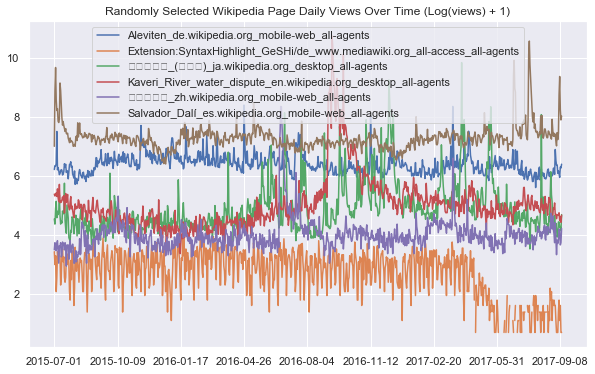

In [15]:
pages, cmp_enc_start, cmp_enc_end, pred_steps, series_array, data_start_date, data_end_date, train_pred_start, train_pred_end, train_enc_start,\
           train_enc_end,  val_enc_start, val_enc_end, date_to_index, val_pred_start, val_pred_end=preprocessing()

In [16]:
series_array

array([[18., 11.,  5., ..., 23., 54., 38.],
       [11., 14., 15., ..., 23., 13., 81.],
       [ 1.,  0.,  1., ...,  4.,  7.,  6.],
       ...,
       [nan, nan, nan, ..., 21., 16.,  6.],
       [nan, nan, nan, ...,  4.,  3.,  3.],
       [nan, nan, nan, ...,  6., 10.,  3.]])

In [19]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
latent_dim = 50
dropout = 0.20

In [20]:
encoder_inputs = Input(shape=(None,1))
encoder = LSTM(latent_dim,dropout = dropout,return_state = True)
encoder_output,state_h,state_c = encoder(encoder_inputs)


In [25]:
encoder_states = [state_h,state_c]


In [24]:
decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(latent_dim,dropout = dropout,return_sequences=True,return_state=True)


In [27]:
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

In [28]:
decoder_dense = Dense(1) # 1 continuous output at each timestep
decoder_outputs = decoder_dense(decoder_outputs)


In [32]:
model = Model([encoder_inputs,decoder_inputs],decoder_outputs)

In [33]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 50), (None,  10400       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 50), ( 10400       input_2[0][0]                    
                                                                 lstm_1[0][1]               

In [56]:
first_n_samples = 2000
batch_size = 2**11
epochs =100

In [57]:
encoder_input_data = get_time_block_series(series_array,date_to_index,train_enc_start,train_enc_end)[:first_n_smaples]
encoder_input_data,encode_series_mean = transform_series_encode(encoder_input_data)
decoder_target_data = get_time_block_series(series_array,date_to_index,train_pred_start,train_pred_end)[:first_n_smaples]

In [59]:
decode

IndexError: too many indices for array

In [51]:
decoder_input_data = np.zeros((decoder_target_data.shape))
#decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

IndexError: too many indices for array

In [52]:
decoder_input_data.shape

(2000, 24)

In [43]:
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

IndexError: too many indices for array

In [40]:
decoder_target_data

array([[31., 19., 14., ..., 14., 19., 39.],
       [18., 13., 12., ..., 12., 13., 20.],
       [ 2.,  3.,  3., ...,  3.,  3.,  3.],
       ...,
       [10.,  5.,  9., ..., 22.,  9., 17.],
       [15., 13.,  5., ..., 17., 21., 14.],
       [20., 21.,  9., ..., 13., 24., 11.]])